# Add code here to visualize parts of the data using the dataloader

In [1]:
import yaml
import matplotlib.pyplot as plt

from geospatial_unet_pytorch.dataset.dataset_hrmelt import HRMeltDataset

ModuleNotFoundError: No module named 'geospatial_unet_pytorch'

In [37]:
# Import cfg
cfg_path = '../runs/unet_smp/demo_run/config/config.yaml'
cfg = yaml.safe_load(open(cfg_path, 'r'))

# Adjust relative paths for call from this notebook
for cfg_key in cfg.keys():
    if 'path_' in cfg_key:
        cfg[cfg_key] = '../' + cfg[cfg_key]

cfg['img_size'] = [1024, 1024]
dataset = HRMeltDataset(cfg=cfg, split='val', verbose=False)

In [38]:
# Retrieve one sample from the dataset
sample = dataset.__getitem__(idx=0)
inputs, targets, targets_mask, meta = sample

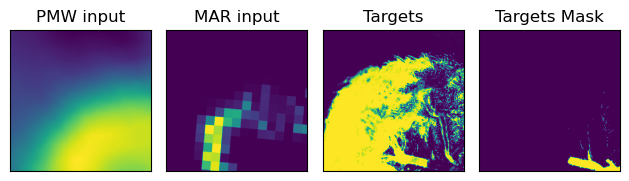

In [66]:
# Plot one sample from the dataset
fig, axs = plt.subplots(1,4)
axs[0].imshow(inputs[0,...])
axs[1].imshow(inputs[1,...])
axs[2].imshow(targets[0,...])
axs[3].imshow(targets_mask[0,...])

axs[0].title.set_text('PMW input')
axs[1].title.set_text('MAR input')
axs[2].title.set_text('Targets')
axs[3].title.set_text('Targets Mask')
for ax in axs:
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()